In [23]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [24]:
img = cv2.imread("./test_images/maria.jpg")
img.shape

(425, 350, 3)

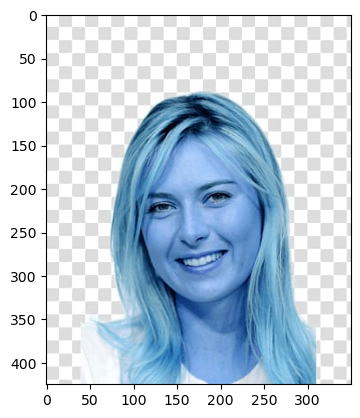

In [25]:
plt.imshow(img)

In [26]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(425, 350)

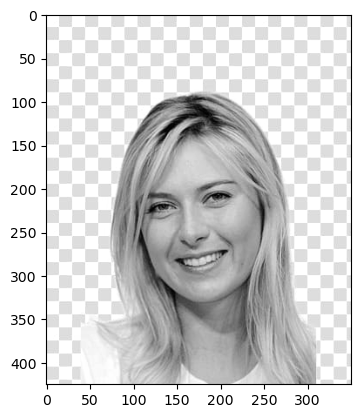

In [27]:
plt.imshow(gray, cmap='gray')

In [28]:
face_cascade = cv2.CascadeClassifier("./openCV/haarcascades/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("./openCV/haarcascades/haarcascade_eye.xml")

In [29]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[ 81, 149, 174, 174]])

In [30]:
(x, y, w, h) = faces[0]
x, y, w, h

(81, 149, 174, 174)

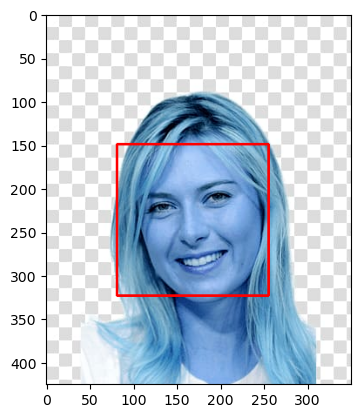

In [31]:
face_img = cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 2)
plt.imshow(face_img)

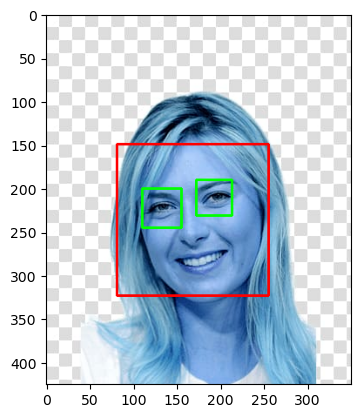

In [32]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

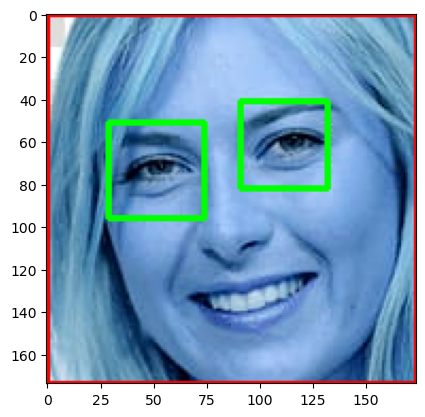

In [33]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [34]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

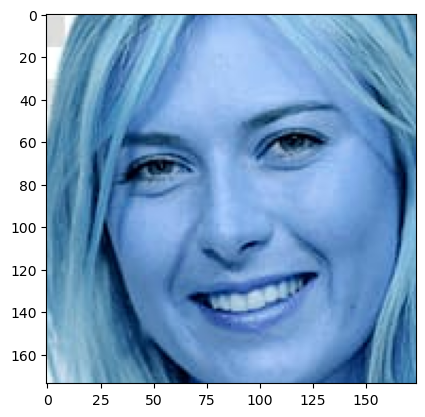

In [36]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/maria.jpg')
plt.imshow(cropped_image)

In [1]:
path_to_data = './dataset/'
path_to_cr_data = './dataset/cropped/'

In [2]:
import os
image_dir = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        image_dir.append(entry.path)

In [3]:
image_dir

['./dataset/lionel_messi',
 './dataset/maria_sharapova',
 './dataset/roger_federer',
 './dataset/serena_williams',
 './dataset/virat_kohli']